In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

(512, 512)


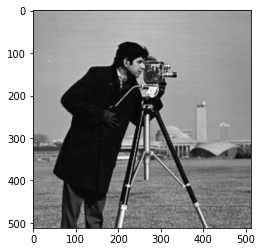

In [2]:
p=input("enter path of cover image")
cover=cv2.imread('images/'+p,0)
print(cover.shape)
plt.imshow(cover,cmap='gray')
plt.show()

(256, 256)


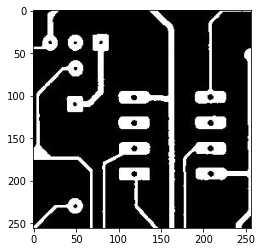

In [3]:
#msg=cv2.imread('images/GRAY_8BIT_100x100/'+input("enter path of message image"),0)
msg=cv2.imread('images/'+input("enter path of message image"),0)
print(msg.shape)
plt.imshow(msg,cmap='gray')
plt.show()
#4.1.05.tiff

In [4]:
cover1d=cover.flatten()
msg1d=msg.flatten()
print(cover1d)
print(msg1d)

[159 159 159 ... 112 110 119]
[0 0 0 ... 0 0 8]


In [5]:
msg_bin=''
for i in msg1d:
    msg_bin+=format(int(i),'08b')
print(msg_bin)

0000000000000000000000000000000000000000000000000000000111111111111111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111111000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000001000000010000000000000000000000000000000000000010000000000000000000000000000111101111111111111101101111111111111011111101101000100000000000000001000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111111111101111111111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011101101111011011111111100001000000000000000000000000000000000000

[[156 156 156 ... 152 152 152]
 [152 156 156 ... 155 151 151]
 [156 156 156 ... 152 148 148]
 ...
 [120 120 128 ... 124 116 104]
 [123 119 127 ... 128 116 104]
 [124 120 126 ... 112 110 116]]


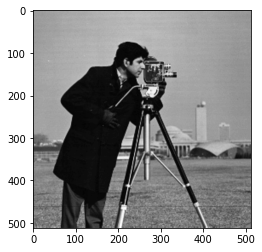

In [6]:
mbt=0
bits=2
for i in range(cover1d.shape[0]):
    bt=format(int(cover1d[i]),'08b')
    ad=msg_bin[mbt:mbt+bits]
    if ad=='':
        break
    bt=bt[:8-bits]+ad
    mbt+=bits
    cover1d[i]=int(bt,2)
cover_stego=cover1d.reshape(cover.shape)
print(cover_stego)
plt.imshow(cover_stego,cmap='gray')
plt.show()

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 247 255 ...   8   0   0]
 [247 255 255 ...   8   0   0]
 [255 255 247 ...   0   0   8]]


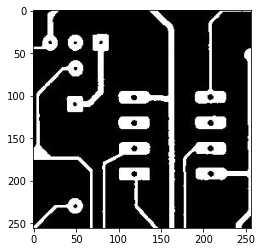

In [7]:
size=math.ceil((msg.shape[0]*msg.shape[1]*8)/bits)
msgl=[]
stego1d=cover_stego.flatten()
msg_bin=''
for i in stego1d:
    size-=1
    msg_bin+=format(int(i),'08b')[8-bits:]
    if len(msg_bin)>=8:
        msgl.append(int(msg_bin[:8],2))
        msg_bin=msg_bin[8:]
    if size==0:
        break
msg_dc=np.array(msgl,dtype=np.uint8).reshape(msg.shape[0],msg.shape[1])
print(msg_dc)
plt.imshow(msg_dc,cmap='gray')
plt.show()

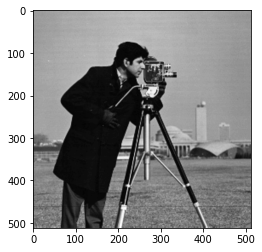

In [8]:
#########                       STEGANOGRAPHY ENCODING (WITHOUT SIZE ENCODING)                 ##########

def stego_encode_LSB(cover,msg,bits):
    if type(msg)==np.ndarray:
        msg_size=msg.shape[0]*msg.shape[1]*8
        msg1d=msg.flatten()
        typ='int'
    elif type(msg)==str:
        msg_size=len(msg)*8
        msg1d=msg
        typ='str'
    if (cover.shape[0]*cover.shape[1])<(msg_size/bits):
        print('message too large')
        return
    cover1d=cover.flatten()
    msg_bin=''
    for i in msg1d:
        if typ=='int':
            msg_bin+=format(int(i),'08b')
        elif typ=='str':
            msg_bin+=format(ord(i),'08b')
    mbt=0
    for i in range(cover1d.shape[0]):
        bt=format(int(cover1d[i]),'08b')
        ad=msg_bin[mbt:mbt+bits]
        if ad=='':
            break
        bt=bt[:8-bits]+ad
        mbt+=bits
        cover1d[i]=int(bt,2)
    cover_stego=cover1d.reshape(cover.shape)
    return cover_stego

cover_stego=stego_encode_LSB(cover,msg,2)
plt.imshow(cover_stego,cmap='gray')
plt.show()

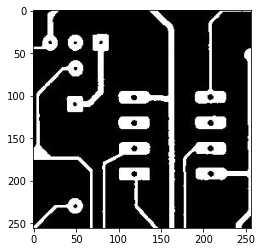

In [9]:
#########                       STEGANOGRAPHY DECODING (WITHOUT SIZE ENCODING)                 ##########

def stego_decode_LSB(stego,size,bits):
    size=math.ceil((size*8)/bits)
    msg=[]
    stego1d=stego.flatten()
    msg_bin=''
    for i in stego1d:
        size-=1
        msg_bin+=format(int(i),'08b')[8-bits:]
        if len(msg_bin)>=8:
            msg.append(int(msg_bin[:8],2))
            msg_bin=msg_bin[8:]
        if size==0:
            break
    return msg

msg_dec=stego_decode_LSB(cover_stego,msg.shape[0]*msg.shape[1],2)
msg_dec=np.array(msg_dec,dtype=np.uint8).reshape(msg.shape[0],msg.shape[1])
plt.imshow(msg_dec,cmap='gray')
plt.show()

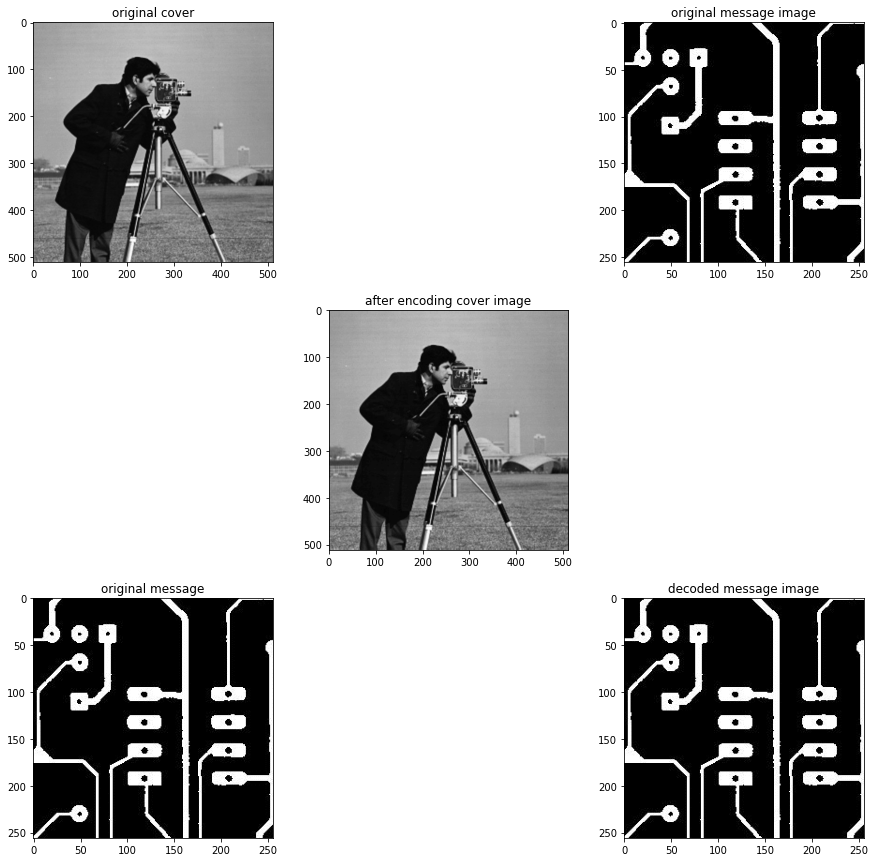

original cover image and stego image
-------------------------------------
MSE:  3.4306716918945312
PSNR:  42.77701201896776
SSIM:  0.9805313079801061

original message image and recovered message image
-----------------------------------------------------
MSE:  0.0
PSNR:  inf
SSIM:  1.0


In [10]:
from skimage import metrics

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('original cover')
plt.imshow(cover,cmap='gray')
plt.subplot(3,3,3)
plt.title('original message image')
plt.imshow(msg,cmap='gray')
plt.subplot(3,3,5)
plt.title('after encoding cover image')
plt.imshow(cover_stego,cmap='gray')
plt.subplot(3,3,7)
plt.title('original message')
plt.imshow(msg,cmap='gray')
plt.subplot(3,3,9)
plt.title('decoded message image')
plt.imshow(msg_dec,cmap='gray')
plt.show()
print('original cover image and stego image')
print('-------------------------------------')
print("MSE: ",metrics.mean_squared_error(cover,cover_stego))
print("PSNR: ",metrics.peak_signal_noise_ratio(cover,cover_stego))
print("SSIM: ",metrics.structural_similarity(cover,cover_stego))
print('\noriginal message image and recovered message image')
print('-----------------------------------------------------')
print("MSE: ",metrics.mean_squared_error(msg,msg_dec))
print("PSNR: ",metrics.peak_signal_noise_ratio(msg,msg_dec))
print("SSIM: ",metrics.structural_similarity(msg,msg_dec))